# Modeling with `scikit-learn`
<br>
<center>
<img src="https://raw.githubusercontent.com/uc-r/Advanced-R/f1001a5b40b5e3803e4cd01a40c7129fee3afb39/docs/images/process-icon.svg" alt="fortune-teller.gif" width="1200" height="1200">
</center>

# Introduction to Machine Learning

## Introduction

Machine learning (ML) continues to grow in importance for many organizations across nearly all domains. Some example applications of machine learning in practice include:

* Predicting the likelihood of a patient returning to the hospital (_readmission_) within 30 days of discharge.
* Segmenting customers based on common attributes or purchasing behavior for targeted marketing.
* Predicting coupon redemption rates for a given marketing campaign.
* Predicting customer churn so an organization can perform preventative intervention.
* And many more!

To address each scenario, we can use a given set of _features_ to train an _algorithm_ and extract insights.

## Types of modeling

These algorithms, or _learners_, can be classified according to the amount and type of supervision needed during training.  

Two primary categories of algorithms:
   
- ___supervised learners___ which construct predictive models
- ___unsupervised learners___ which build descriptive models. 
   
Which type you will need to use depends on the learning task you hope to accomplish.

## Supervised learning

A ___predictive model___ is used for tasks that involve the prediction of a given output (or target) using other variables (or features) in the data set.

The learning algorithm in a predictive model attempts to discover and model the relationships among the <font color="red">target</font> variable (the variable being predicted) and the other <font color="blue">features</font> (aka predictor variables). 

Examples of predictive modeling include:

* using <font color="blue">customer attributes</font> to predict the probability of the <font color="red">customer churning</font> in the next 6 weeks;
* using <font color="blue">home attributes</font> to predict the <font color="red">sales price</font>;
* using <font color="blue">employee attributes</font> to predict the likelihood of <font color="red">attrition</font>;
* using <font color="blue">patient attributes</font> and symptoms to predict the risk of <font color="red">readmission</font>;
* using <font color="blue">production attributes</font> to predict <font color="red">time to market</font>.

## Types of supervised learning


Most supervised learning problems can be bucketed into one of two categories, _regression_ or _classification_

* __Regression__: objective is to predict a numeric outcome
   - What is the expected sales price?
   - What is the expected wait time?
   - What is the expected time to market?
* __Classification__: objective is to predict a categorical outcome
   - Did a customer redeem a coupon (coded as yes/no or 1/0)?
   - Did a customer churn (coded as yes/no or 1/0)?
   - Did a customer click on our online ad (coded as yes/no or 1/0)?

## Unsupervised learning

A set of statistical tools to better understand _n_ observations that contain a set of features without being guided by a response variable.

In essence, unsupervised learning is concerned with identifying groups in a data set

* __clustering__: reduce the observation space of a data set
* __dimension reduction__: reduce the feature space of a data set

<center>
<img src="https://uc-r.github.io/Advanced-R/images/clustering_vs_pca.jpeg" alt="modeling-process" width="2000">
</center>

# Today's focus

- __Supervised learning__ for a __regression problem__

- using <font color="blue">home attributes</font> to predict real estate <font color="red">sales price</font>

- __Objective__: understand the basic supervised learning modeling process and how to implement with scikit-learn

Our ___Advanced Python workshop___ will go into much more detail than we have time for here.


# Supervised learning modeling process

## Modeling Process

* The machine learning process is very iterative and heurstic-based

* Common for many ML approaches to be applied, evaluated, and modified before a final, optimal model can be determined

* A proper process needs to be implemented to have confidence in our results

<center>
<img src="https://uc-r.github.io/Advanced-R/images/modeling_process.png" alt="modeling-process" width="900" height="900">
</center>

## Modeling Process

This module provides an introduction to the modeling process and the concepts that are useful for any type of machine learning model:

* data splitting

* model application

* resampling

* bias-variance trade-off -- hyperparameter tuning

* model evaluation

## Prerequisites - packages

In [1]:
# Helper packages
import math
import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_density,
    geom_line, geom_point, ggtitle
)

# Modeling process
from sklearn.model_selection import (
    train_test_split, KFold, RepeatedKFold, cross_val_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Prerequisites - Ames housing data

- __problem type__: supervised regression
- __response variable__: `Sale_Price` (i.e., \\$195,000, \\$215,000)
- __features__: 80 
- __observations__: 2,930
- __objective__: use property attributes to predict the sale price of a home

In [2]:
# Ames housing data
ames = pd.read_csv("../data/ames.csv")

In [3]:
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


### <font color="red">Your Turn</font>

Take 5 minutes to explore the housing data

- What does the distribution of the response variable (`Sale_Price`) look like?

- How could the different features be helpful in predicting the sales price?

# Data Splitting

## Generalizability

__Generalizability__: we want an algorithm that not only fits well to our past data, but more importantly, one that <font color="blue">predicts a future outcome accurately</font>.

* __Training Set__: these data are used to develop feature sets, train our algorithms, tune hyper-parameters, compare across models, and all of the other activities required to reach a final model decision.

* __Test Set__: having chosen a final model, these data are used to estimate an unbiased assessment of the model’s performance (generalization error).

<img src="https://uc-r.github.io/Advanced-R/images/nope.png" alt="modeling-process" width="300" style="float:right" >

<font color="red">DO NOT TOUCH THE TEST SET UNTIL THE VERY END!!!</font>

## What's the right split?

* typical recommendations for splitting your data into training-testing splits include 60% (training) - 40% (testing), 70%-30%, or 80%-20%

* as data sets get smaller ($n < 500$):
   - spending too much in training ($> 80$%) won’t allow us to get a good assessment of predictive performance. We may find a model that fits the training data very well, but is not generalizable (overfitting),
   - sometimes too much spent in testing ($> 40$%) won’t allow us to get a good assessment of model parameters

* as n gets larger ($n > 100$K):
   - marginal gains with larger sample sizes
   - may use a smaller training sample to increase computation speed

* as p gets larger ($p \geq n$)
   - larger samples sizes are often required to identify consistent signals in the features

## Mechanics of data splitting

In [17]:
# create train/test split
train, test = train_test_split(ames, train_size=0.7, random_state=123)

(2051, 81)

In [28]:
# dimensions of training data
train.shape

(2051, 81)

In [16]:
# dimensions of testing data
test.shape

(879, 81)

## Visualizing response distribution

Always good practice to ensure the distribution of our target variable is similar across the training and test sets

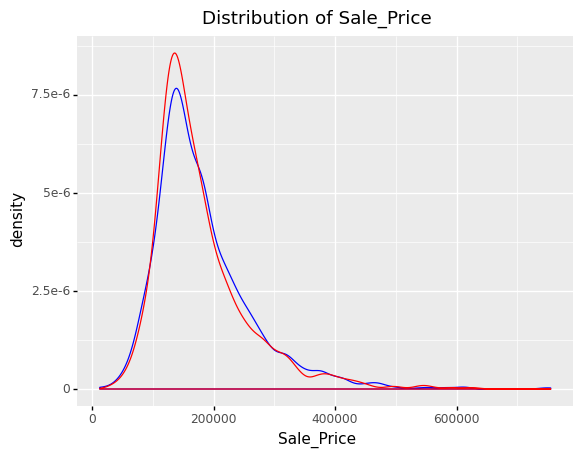

<ggplot: (317801978)>

In [15]:
(ggplot(train, aes(x='Sale_Price'))
 + geom_density(color='blue')
 + geom_density(data = test, color = "red")
 + ggtitle("Distribution of Sale_Price"))

## Separating features & target

* In Python, we are required to separate our features from our label into discrete data sets. 

* For our first model we will simply use two features from our training data - total square feet of the home (`Gr_Liv_Area`) and year built (`Year_Built`) to predict the sale price. 

In [18]:
# separate features from labels
X_train = train[["Gr_Liv_Area", "Year_Built"]]
y_train = train["Sale_Price"]

# Creating Models

## Creating Models with scikit-learn

Scikit-learn has many modules for supervised learning

* Linear models (i.e. ordinary least squares)
* Nearest neighbors (i.e. _K_-nearest neighbor)
* Tree-based models (i.e. decision trees, random forests)
* and many more: https://scikit-learn.org/stable/supervised_learning.html

To apply these models, they all follow a similar pattern:

1. Identify the appropriate module
2. Instantiate the model object
3. Fit the model
4. Make predictions

## Ordinary least squares

In [42]:
# 1. Prerequisite
from sklearn.linear_model import LinearRegression

In [43]:
# 2. Instantiate the model object
reg = LinearRegression()

In [44]:
# 3. Fit the model
reg.fit(X_train, y_train)

LinearRegression()

In [45]:
# 4. Make predictions
reg.predict(X_train)

array([211888.77551558, 119021.83893513, 177818.03700616, ...,
       294633.08255955, 213774.91574325, 166398.33102108])

## K-nearest neighhbor

In [ ]:
# 1. Prerequisite
from sklearn.neighbors import KNeighborsRegressor

In [34]:
# 2. Instantiate the model object
knn = KNeighborsRegressor()

In [35]:
# 3. Fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
# 4. Make predictions
knn.predict(X_train)

array([218400. , 131280. , 142600. , ..., 318647.2, 180820. , 149480. ])

### <font color="red">Your Turn</font>

Create and predict a model using the random forest algorithm.

In [37]:
# 1. Prerequisite
from sklearn.ensemble import RandomForestRegressor

In [38]:
# 2. Instantiate the model object
rf = RandomForestRegressor()

In [39]:
# 3. Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
# 4. Make predictions
rf.predict(X_train)

array([160900.       , 118719.83     , 142907.2281746, ...,
       291945.       , 199915.94     , 136045.63     ])

# Evaluating Models

## Evaluating model performance

- It is important to understand how our model is performing. 

- With ML models, measuring performance means understanding the predictive accuracy -- the difference between a predicted value and the actual value. 

- We measure predictive accuracy with ___loss functions___.

## Many loss functions for regression problems

* __Mean Square Error__ (MSE) = $\frac{1}{n} \sum^n_{i=1} (y_i - \hat{y}_i)^2$

* __Root Mean Square Error__ (RMSE) = $\sqrt{MSE}$

* Other common loss functions
   - Mean Absolute Error (MAE)
   - Mean Absolute Percent Error (MAPE)
   - Root Mean Squared Logarithmic Error (RMSLE)

## Computing MSE

In [48]:
# compute MSE for linear model
pred = reg.predict(X_train)
mse = mean_squared_error(y_train, pred)
mse

2313058425.399425

In [49]:
rmse = math.sqrt(mse)
rmse

48094.2660345225

On average, our model's predictions are over \\$48,000 off from the actual sales price!!

### <font color="red">Your Turn</font>

With MSE & RMSE our objective is to ___minimize___ this value. 

* Compare the MSE & RMSE for the K-nearest neighbor and random forest model to our linear model.

* Which model performs best?

* Are we certain this is the best way to measure our models' performance?

# Resampling Methods

## Resampling methods

Provides an approach for us to repeatedly fit a model of interest to parts of the training data and test the performance on other parts.

* Allows us to estimate the generalization error while training, tuning, and comparing models without using the test data set

* The two most commonly used resampling methods include:
   - _k_-fold cross validation
   - bootstrapping.
   
 <img src="https://uc-r.github.io/Advanced-R/images/resampling.png" alt="resampling" width="800" style="float:right" >

## _K_-fold cross validation

* randomly divides the training data into k groups of approximately equal size

* assign one block as the <font color="orange">test block</font> and the rest as <font color="blue">training block</font>

* train model on each folds' <font color="blue">training block</font> and evaluate on <font color="orange">test block</font>

* average performance across all folds
<br>
<center>
<img src="https://uc-r.github.io/Advanced-R/images/cv.png" alt="kfold" width="800"></center>

<br>

<center><b><i>k</i> is usually taken to be 5 or 10</b></center>

## _K_-fold CV implementation

* Use `KFold` to create k-fold objects and then 
* `cross_val_score` to train our model across all *k* folds and provide our loss score for each fold

In [52]:
# define loss function
loss = 'neg_root_mean_squared_error'

# create 10 fold CV object
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# fit KNN model with 10-fold CV
results = cross_val_score(
    knn, X_train, y_train, cv=kfold, scoring=loss
)
results

array([-44583.38859714, -39957.83856145, -52263.36195081, -46346.53026398,
       -45877.92144006, -52985.87820756, -42821.23386972, -45202.86591605,
       -48556.0637338 , -58529.11695189])

__Note__: The unified scoring API in scikit-learn always maximizes the score, so scores which need to be minimized are negated in order for the unified scoring API to work correctly. Consequently, you can just interpret the RMSE values below as the $RMSE \times -1$.

## _K_-fold results

In [59]:
# summary stats for all 10 folds
pd.DataFrame(results * -1).describe()

,0
count,10.000000
mean,47712.419949
std,5493.532316
min,39957.838561
25%,44738.257927
50%,46112.225852
75%,51336.537397
max,58529.116952


### <font color="red">Your Turn</font>

* Compute _K_-fold results for the linear model and/or the random forest model.

* How do the results compare?

# Hyperparameter Tuning

## Bias-variance trade-off

* Prediction errors can be decomposed into two main subcomponents we have control over:

   - error due to “bias”
   - error due to “variance”

* There is a tradeoff between a model’s ability to minimize bias and variance.

* Understanding how different sources of error lead to bias and variance helps us improve the data fitting process resulting in more accurate models.

## Bias

_Bias_ is the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict.

Some models are naturally ___high bias___: 

* Models that are not very flexible (i.e. generalized linear models)
* High bias models are rarely affected by the noise introduced by resampling

<center>
<img src="https://uc-r.github.io/Advanced-R/03-supervised-modeling-process_files/figure-html/bias-model-1.png" alt="bias" width="800">
</center>

## Variance

Error due to ___variance___ is defined as the variability of a model prediction for a given data point.

Some models are naturally high variance:

* Models that are very adaptable and offer extreme flexibility in the patterns that they can fit to (e.g., _k_-nearest neighbor, decision trees, gradient boosting machines).  
* These models offer their own problems as they run the risk of overfitting to the training data.  
* Although you may achieve very good performance on your training data, the model will not automatically generalize well to unseen data.

<center>
<img src="https://uc-r.github.io/Advanced-R/03-supervised-modeling-process_files/figure-html/variance-model-1.png" alt="variance" width="800">
</center>

## Hyperparameter tuning

So what does this mean to you?

* We tend to like very flexible models since they can capture many patterns in our data,
* but we need to control variance so our model generalizes to new data well.
* ___Hyperparameters___ can help to control bias-variance trade-off

## Hyperparameter tuning

Hyperparameters are the "knobs to twiddle" to control of complexity of machine learning algorithms and, therefore, the bias-variance trade-off

<center>
<img src="https://uc-r.github.io/Advanced-R/03-supervised-modeling-process_files/figure-html/example-knn-1.png" alt="variance" width="800">
</center>

_k_-nearest neighbor model with differing values for _k_. Small _k_ value has too much variance. Big _k_ value has too much bias. <font color="red">How do we find the optimal value?</font>

## Grid search

* A grid search is an automated approach to searching across many combinations of hyperparameter values

* We perform a grid search with `GridSearchCV()` and supply it a model object and hyperparameter values we want to assess. 

* Also notice that we supply it with the `kfold` object we created previously and the `loss` function we want to optimize for. 

In [69]:
# Basic model object
knn = KNeighborsRegressor()

# Hyperparameter values to assess
hyper_grid = {'n_neighbors': range(2, 26)}

# Create grid search object
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)

# Tune a knn model using grid search
results = grid_search.fit(X_train, y_train)

In [70]:
# Best model's cross validated RMSE
abs(results.best_score_)

46635.769325114525

In [71]:
# Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

13

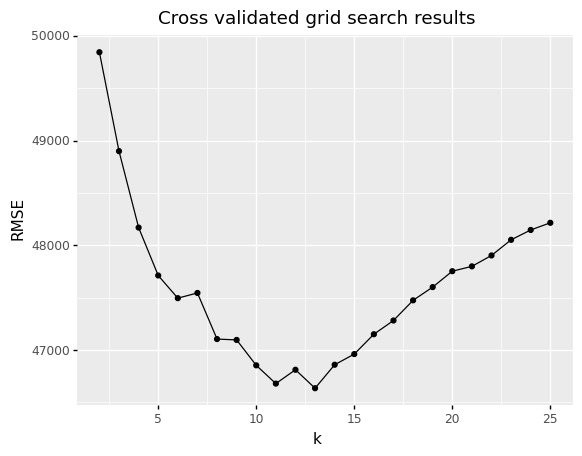

<ggplot: (321604184)>

In [72]:
# Plot all RMSE results
all_rmse = pd.DataFrame({
    'k': range(2, 26),
    'RMSE': np.abs(results.cv_results_['mean_test_score'])
})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

# Putting the Processes Together

## Putting the Processes Together

You've been exposed to a lot in a very short amount of time. Let's bring these pieces together but rather than just look at the 2 features that we included thus far (`Gr_Liv_Area` & `Year_Built`), we'll include ___all numeric features___.

__Steps:__

1. Split into training vs testing data

2. Separate features from labels and only use numeric features

3. Create KNN model object

4. Define loss function

5. Specify _K_-fold resampling procedure

6. Create our hyperparameter grid

7. Execute grid search

8. Evaluate performance

In [73]:
# 1. Split into training vs testing data
train, test = train_test_split(ames, train_size=0.7, random_state=123)

# 2. Separate features from labels and only use numeric features
X_train = (
    train.select_dtypes(include='number').drop("Sale_Price", axis=1)
)
y_train = train["Sale_Price"]

# 3. Create KNN model object
knn = KNeighborsRegressor()

# 4. Define loss function
loss = 'neg_root_mean_squared_error'

# 5. Specify K-fold resampling procedure
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

# 6. Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 26)}

# 7. Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=kfold, scoring=loss)
results = grid_search.fit(X_train, y_train)

In [74]:
# 8. Evaluate performance: Best model's cross validated RMSE
abs(results.best_score_)

41915.408581298376

In [75]:
# 8. Evaluate performance: Best model's k value
results.best_estimator_.get_params().get('n_neighbors')

5

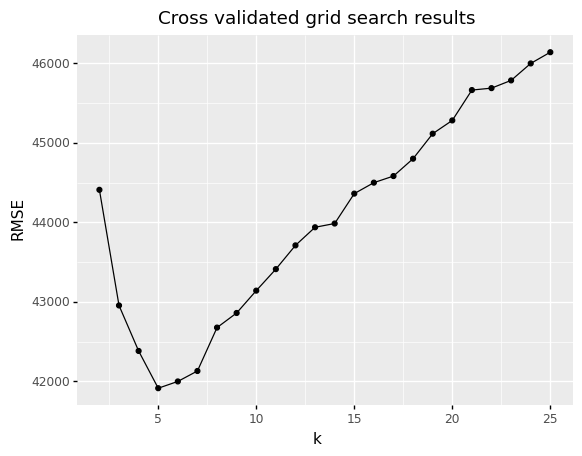

<ggplot: (321486053)>

In [76]:
# 8. Evaluate performance: Plot all RMSE results
all_rmse = pd.DataFrame({
    'k': range(2, 26),
    'RMSE': np.abs(results.cv_results_['mean_test_score'])
})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Can we do better?

* Is this the best we can do?

* Do you think other models could perform better?

* Are we doing the best with the features we've been given?

<br><br>
<center><b>Come to our Advanced Python workshop to find out more!</b></center>

## Learning More

* **Don't feel intimated** -- you're not going to learn this in an hour

* There are a lot of things you can do to improve your skills

* Books
  * *Introduction to Statistical Learning* or *Elements of Statistical Learning*, Hastie, Tibshirani, and Friedman
  * *Python Data Science Handbook*, Jake VanderPlas
  * *Hands-on Machine Learning with scikit-learn and TensorFlow*, Aurélien Géron

* Online Courses
  * Machine Learning with Python - Coursera

* Practice
  * Use your own data
  * Kaggle

## Questions

Are there any questions before moving on?